## Figures

In [1]:
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}datasets/"

In [3]:
#def sigma(d):
#    """
#    Return d*(d+1)/2, the sum of the first d integers"""
#    return d * (d + 1) / 2

## try dataset

In [4]:
xgi.load_xgi_data()

Available datasets are the following:
coauth-dblp
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
dawn
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
hypertext-conference
invs13
invs15
kaggle-whats-cooking
malawi-village
ndc-classes
ndc-substances
science-gallery
sfhh-conference
tags-ask-ubuntu
tags-math-sx
tags-stack-overflow


In [5]:
data_names = [
    #"email-enron",
    #"email-eu",
    #"kaggle-whats-cooking",
    #"hospital-lyon",
    #"contact-high-school",
    #"contact-primary-school",
    #"tags-ask-ubuntu",
    #"congress-bills",
    #"disgenenet",
    #"diseasome",
    #"ndc-substances",
    "coauth-mag-geology",
    #"coauth-mag-history",
    #"coauth-dblp",
    ]

HGs = {}
for name in tqdm(data_names): 
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 1/1 [00:22<00:00, 22.86s/it]


In [135]:
i = 0 # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))
N = H0.num_nodes

rescale = True

coauth-mag-geology
Hypergraph named coauth-MAG-Geology with 898648 nodes and 833158 hyperedges
max order: 24
Hypergraph named coauth-MAG-Geology with 898648 nodes and 833158 hyperedges


In [136]:
H0.edges[0]

{'timestamp': 1985, 'label': 0}

In [137]:
years = [H0.edges[i]["timestamp"] for i in H0.edges]

In [138]:
year = 1988
idx_keep = np.where(np.array(years)==year)[0]
idx_keep

array([    36,     86,    133, ..., 833064, 833133, 833156])

In [139]:
H = xgi.subhypergraph(H0, edges=idx_keep).copy()

print(H)
H.cleanup(isolates=False, singletons=True, connected=True)
print(H)

Hypergraph named coauth-MAG-Geology with 898648 nodes and 9509 hyperedges
Hypergraph named coauth-MAG-Geology with 4668 nodes and 2177 hyperedges


In [140]:
H0 = H
orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))
N = H0.num_nodes

In [141]:
sparse = True

In [142]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, sparse=sparse)

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

In [143]:

inverse_rescaling_factors = [max(orders) / d for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale, sparse=sparse)

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 8.933975173157562e-13


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 3.3637148934113873e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b 

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 4.2634230665293605e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:347: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEffic

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 5.227437893760718e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/.pyenv/versions/venv_xgi/lib/py

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 6.1085674294564604e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 6.180375262680144e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 6.5533514921117304e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 6.600384877454051e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 6.931626231823345e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.127916754531557e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.033196109175591e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.358937670742686e-12
logm result may be inaccurate, approximate err = 7.059800473829037e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.083295974888236e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.358937670742686e-12
logm result may be inaccurate, approximate err = 6.875598525119608e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.022290396176243e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.358660965512577e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.173819118694498e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.358937670742686e-12
logm result may be inaccurate, approximate err = 7.395906280019868e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.2549823752587714e-12


/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/S

logm result may be inaccurate, approximate err = 7.402926097373038e-12
logm result may be inaccurate, approximate err = 7.402926097373038e-12


In [144]:
np.savez(
    f"{out_dir}/message_length_{name}_{year}.npz",
    message_length=Ds_H + lZs_H,
    KL=Ds_H,
    complexity=lZs_H,
    orders=orders,
    dataset=name,
    year=year,
    N=N
)

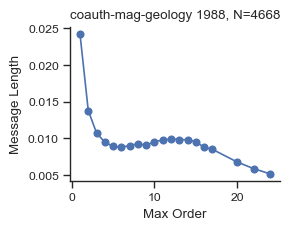

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")


ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"{name} {year}, N={N}")

sb.despine()

fig_name = f"message_length_{name}_{year}_rescaled_tauc"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

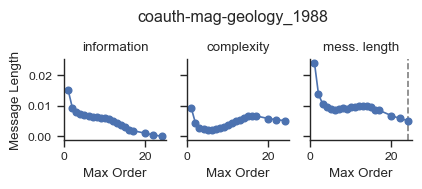

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(4.5, 1.5), sharey=True)

message_length = Ds_H + lZs_H

axs[0].plot(orders, Ds_H, "o-")
axs[0].set_title("information")

axs[1].plot(orders, lZs_H, "o-")
axs[1].set_title("complexity")

axs[2].plot(orders, message_length, "o-")
axs[2].set_title("mess. length")


axs[0].set_ylabel("Message Length")
axs[0].set_xlabel("Max Order")
axs[1].set_xlabel("Max Order")
axs[2].set_xlabel("Max Order")

order_argmin = np.argmin(message_length)
order_min = orders[order_argmin]

axs[2].axvline(order_min, ls="--", c="grey", zorder=-2)

#ax.set_title("functional complex.")

ax.set_title(f"{name} {year}, N={N}")
fig.suptitle(f"{name}_{year}")

sb.despine()
plt.subplots_adjust(top=0.65)

fig_name = f"message_length_{name}_{year}_rescaled_tauc_full"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [67]:
np.log(4)

1.3862943611198906

## all together

In [50]:
data_names = [
    "email-enron",
    #"email-eu",
    "hospital-lyon",
    "contact-high-school",
    #"contact-primary-school",
    #"tags-ask-ubuntu",
    #"congress-bills",
    #"disgenenet",
    #"diseasome",
    #"ndc-substances",
    #"coauth-mag-geology",
    #"coauth-mag-history",
]

HGs = {}
for name in tqdm(data_names): 
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.34it/s]


In [51]:
rescale = True

message_length_arr = []
orders_arr = []

for i, H0 in enumerate(tqdm(HGs)):
    
    # load and clean
    name = data_names[i]
    H0 = HGs[name]
    print(H0)    
    print("max order:", xgi.max_edge_order(H0))
    H0.cleanup(isolates=True)
    print(H0)
    
    orders = np.array(xgi.unique_edge_sizes(H0)) - 1
    weights = np.ones(len(orders))
    N = H0.num_nodes
    
    # compute 
    tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

    inverse_rescaling_factors = [max(orders) / d for d in orders]
    Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)
    
    message_length = Ds_H + lZs_H
    
    message_length_arr.append(message_length)
    orders_arr.append(orders)

  0%|                                                     | 0/3 [00:00<?, ?it/s]

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges
max order: 36
Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


 33%|███████████████                              | 1/3 [00:19<00:39, 19.52s/it]

Hypergraph named hospital-lyon with 75 nodes and 27834 hyperedges
max order: 4
Hypergraph named hospital-lyon with 75 nodes and 1824 hyperedges


 67%|██████████████████████████████               | 2/3 [00:23<00:10, 10.12s/it]

Hypergraph named contact-high-school with 327 nodes and 172035 hyperedges
max order: 4
Hypergraph named contact-high-school with 327 nodes and 7818 hyperedges
logm result may be inaccurate, approximate err = 5.128841825295042e-13
logm result may be inaccurate, approximate err = 4.641378397856407e-13
logm result may be inaccurate, approximate err = 5.128841825295042e-13
logm result may be inaccurate, approximate err = 4.887420895249281e-13
logm result may be inaccurate, approximate err = 5.128841825295042e-13
logm result may be inaccurate, approximate err = 4.570432369407865e-13
logm result may be inaccurate, approximate err = 5.128841825295042e-13


100%|█████████████████████████████████████████████| 3/3 [00:31<00:00, 10.56s/it]

logm result may be inaccurate, approximate err = 5.128841825295042e-13


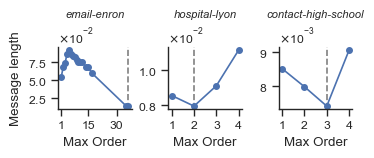

In [54]:
fig, axs = plt.subplots(1, len(data_names), figsize=(3.8, 0.8), sharey=False)#, layout="constrained")

for i, name in enumerate(data_names):
    
    ax = axs[i]
    ax.plot(orders_arr[i], message_length_arr[i], "o-", ms=4)
    
    order_argmin = np.argmin(message_length_arr[i])
    order_min = orders_arr[i][order_argmin]

    ax.axvline(order_min, ls="--", c="grey", zorder=-2)
    ax.set_xlabel("Max Order")
    ax.ticklabel_format(axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True)
    
    ax.set_title(name, fontsize="small", style="italic")

axs[0].set_ylabel("Message length")
axs[0].set_xticks([1, 15, 30])
axs[1].set_xticks([1, 2, 3, 4])
axs[2].set_xticks([1, 2, 3, 4])

plt.subplots_adjust(wspace=0.5)

sb.despine()

fig_name = f"figure_3"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")